## Problem statement (Term Deposit Sale)
#### Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

#### Resources Available
  The historical data for this project is available in file: 
  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Input variables:
#### Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
#### Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
#### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of

#### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
#### A. Univariate analysis (12 marks)
   1. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
   2. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
   3. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
   
#### B. Multivariate analysis (8 marks)
   1. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
   2. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import percentile
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\admin\Desktop\AIML\Project\Project 3\bank-full.csv")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#Target variable is object, converting it to numeric.
data['Target'] = data['Target'].apply(lambda x: 0 if x=='no' else 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
Target,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Luckily we dont have any missing values

In [8]:
data.nunique(axis=0)

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [9]:
#converting object datatype to categorical
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.Categorical(data[column])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null int64
dtypes: category(9), int64(8)
memory usage: 3.1 MB


In [10]:
for i in list(data.columns[data.dtypes=='category']):
    print(data[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

columns job, education, contact,poutcome has 'unknown' as value for few records

In [11]:
for i in list(data.columns[data.dtypes!='category']):
    print("Column",i,"has",data[i][data[i]<0].count(), "negative values")

Column age has 0 negative values
Column balance has 3766 negative values
Column day has 0 negative values
Column duration has 0 negative values
Column campaign has 0 negative values
Column pdays has 36954 negative values
Column previous has 0 negative values
Column Target has 0 negative values


Balance and pdays has negative values.

In [12]:
data['pdays'][data['pdays']<0].value_counts()

-1    36954
Name: pdays, dtype: int64

In [13]:
data[['pdays','day']][data['pdays']<0].nunique()

pdays     1
day      31
dtype: int64

In [14]:
data[data.pdays<0].groupby(['previous','poutcome'])['pdays'].value_counts(sort=True)

previous  poutcome  pdays
0         unknown   -1       36954
Name: pdays, dtype: int64

1. Balance: negative balance indicates that the person have spent more money than he/she have. So it can be negative. 
2. pdays: As per problem statement, -1 tells us the person has not been contacted or contact period is beyond 900 days. So this can also be negative.

### Barplot 

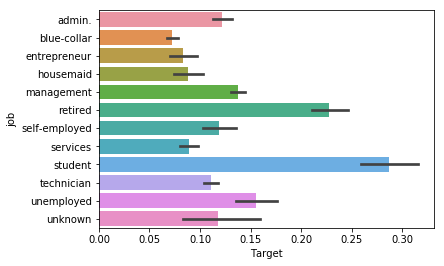

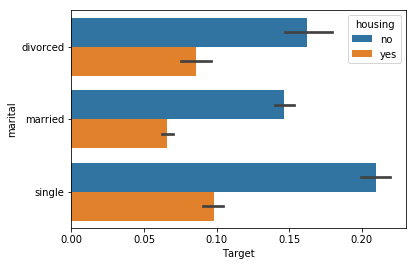

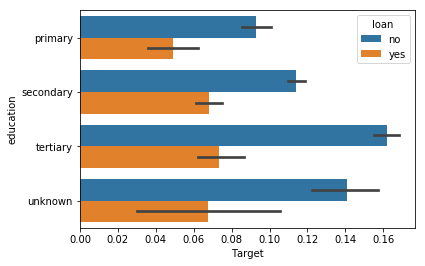

In [15]:
sns.barplot(x='Target',y='job',data=data)
plt.show()
sns.barplot(x='Target',y='marital',data=data, hue='housing')
plt.show()
sns.barplot(x='Target',y='education',data=data, hue='loan')
plt.show()

1. Student do more deposit than other working or non working people
2. Compared to married and divorced, singles has more deposit
3. People who has or doing third level education has more deposit without personal loan.

In [16]:
(data['Target'].value_counts()/45211)*100

0    88.30152
1    11.69848
Name: Target, dtype: float64

As per data, only ~12% of people have term deposit

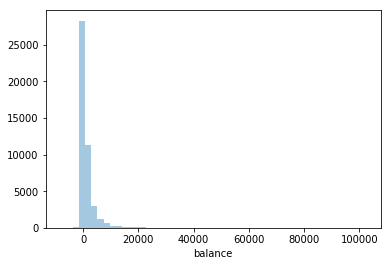

In [17]:
sns.distplot(data.balance, kde=False)
plt.show();

### Validating outliers

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

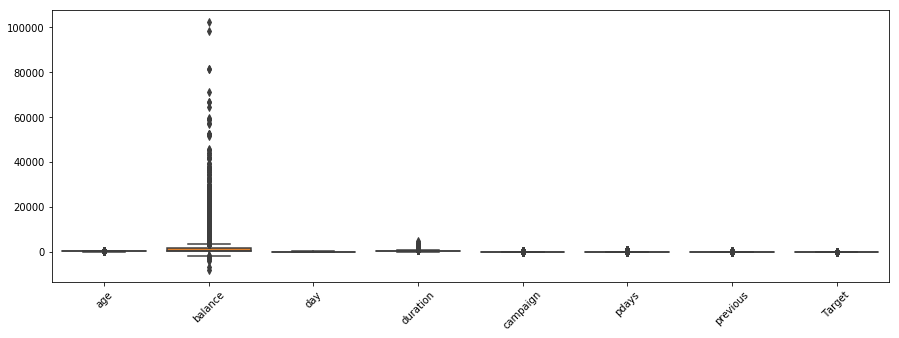

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data= data, ax=ax)
plt.xticks(rotation=45)

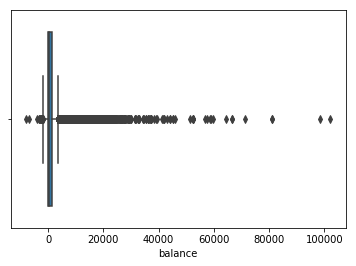

In [19]:
sns.boxplot(x='balance', data= data)

In [20]:
#Identify no.of outliers in balance
q25, q75 = data['balance'].quantile(0.25), data['balance'].quantile(0.75)
# Finding IQR
IQR = q75 - q25
#identifying outliers 
outliers = data['balance'][((data['balance'] < (q25 - 1.5 * IQR)) |(data['balance'] > (q75 + 1.5 * IQR)))]
print("Total outliers in balance column : ",len(outliers))

Total outliers in balance column :  4729


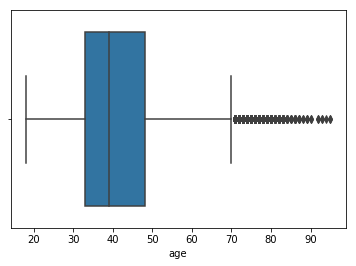

In [21]:
sns.boxplot(x='age', data= data)

In [22]:
#Identify no.of outliers in balance
q25_age, q75_age = data['age'].quantile(0.25), data['age'].quantile(0.75)
# Finding IQR
IQR = q75_age - q25_age
#identifying outliers 
outliers = data['age'][((data['age'] < (q25_age - 1.5 * IQR)) |(data['age'] > (q75_age + 1.5 * IQR)))]
print("Total outliers in age column : ",len(outliers))

Total outliers in age column :  487


### Handling Outliers

In [23]:
q25, q75 = data[['balance','age']].quantile(0.25), data[['balance','age']].quantile(0.75)
# Finding IQR
IQR = q75 - q25
data1 = data[['balance','age']].copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(data1 < q25 - 1.5 * IQR)[0], np.where(data1 < q25 - 1.5 * IQR)[1]): 
    
    whisker  = q25 - 1.5 * IQR
    data1.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(data1 > q75 + 1.5 * IQR)[0], np.where(data1 > q75 + 1.5 * IQR)[1]):
    
    whisker  = q75 + 1.5 * IQR
    data1.iloc[i,j] = whisker[j]

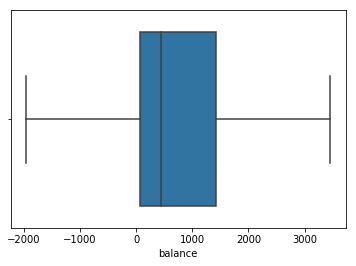

In [24]:
sns.boxplot(x='balance', data= data1)

In [25]:
#Identify no.of outliers in balance
q25, q75 = data1['balance'].quantile(0.25), data1['balance'].quantile(0.75)
# Finding IQR
IQR = q75 - q25
#identifying outliers 
outliers = data1['balance'][((data1['balance'] < (q25 - 1.5 * IQR)) |(data1['balance'] > (q75 + 1.5 * IQR)))]
print("Total outliers in balance column : ",len(outliers))

Total outliers in balance column :  0


In [26]:
#Identify no.of outliers in balance
q25_age, q75_age = data1['age'].quantile(0.25), data1['age'].quantile(0.75)
# Finding IQR
IQR = q75_age - q25_age
#identifying outliers 
outliers = data1['age'][((data1['age'] < (q25_age - 1.5 * IQR)) |(data1['age'] > (q75_age + 1.5 * IQR)))]
print("Total outliers in balance column : ",len(outliers))

Total outliers in balance column :  0


Outliers are handled for balance and age column

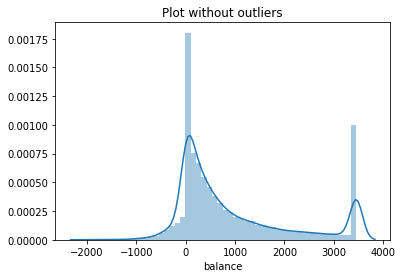

In [27]:
sns.distplot(data1['balance']).set_title("Plot without outliers")
plt.show()

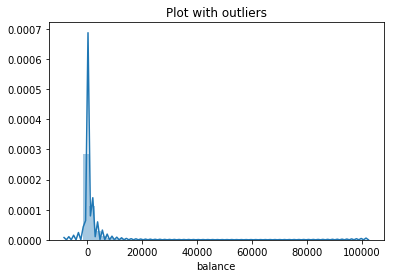

In [28]:
sns.distplot(data['balance']).set_title("Plot with outliers")
plt.show()

#### Bivariant Analysis
boxplots and pair plots, histograms or density curves

In [29]:
data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target          int64
dtype: object

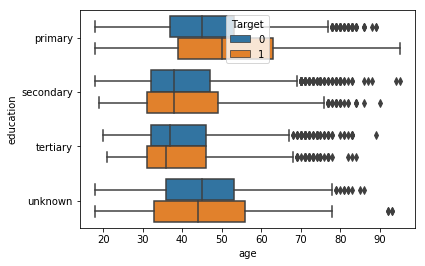

In [30]:
sns.boxplot(x='age', y='education', data=data, hue ='Target')

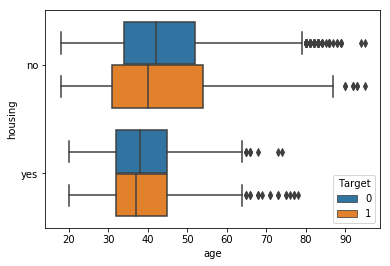

In [31]:
sns.boxplot(x='age', y='housing', data=data, hue ='Target')